In [1]:
import os,sys
import pathlib
sys.path.append(os.path.abspath('.'))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Grab dataset and clean it
path = "/home/jorgefederico/astronomia_extragalactica/practico5/field.dat"
names = ["ra","dec","z","Mr","ur","mur","r50","c","smass","sfr","ssfr","d4000","met", "w","mest","tau","zm","rsf","pe","ps","nuvr"]
df = pd.read_csv(path,delim_whitespace=True,names=names)
df2 = df[(df['smass']!=-9.)&(df["z"]<0.15)&(df['met']!=-99.9)&(9.0<df["smass"])&(df["smass"]<11.5)&(df['z']>0.05)]
df2.reset_index(inplace=True)

# Lista de propiedades:
- Propiedades del catálogo MPA -JHU:
- smass -> masa estelar -> log(M*) en unidades de masa solar
- sfr -> tasa de formación estelar  -> log(SFR) en unidades de Msolar /yr
- ssfr -> tasa de formación estelar específica -> log(sSFR) en unidades de /yr
- d4000 -> Dn(4000)
- met -> metalicidad O/H -> 12+log(O/H)

- w -> peso basado en 1/Vmax

- mest,tau,zm,rsf -> propiedades derivadas de otro catalogo VESTA (no las vamos a usar)
- pe -> probabilidad de ser eliptica de galaxy zoo
- ps -> probabilidad de ser espiral de galaxy zoo
- nuvr - color NUV -r

In [4]:
list(df)

['ra',
 'dec',
 'z',
 'Mr',
 'ur',
 'mur',
 'r50',
 'c',
 'smass',
 'sfr',
 'ssfr',
 'd4000',
 'met',
 'w',
 'mest',
 'tau',
 'zm',
 'rsf',
 'pe',
 'ps',
 'nuvr']

# Control plots

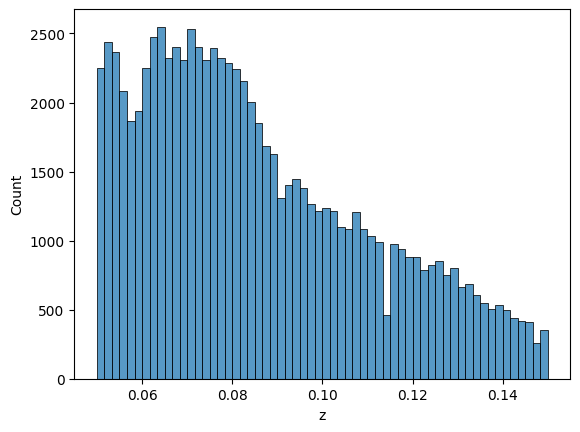

In [5]:
sns.histplot(data=df2,x='z')
plt.savefig("hist_z.jpg")


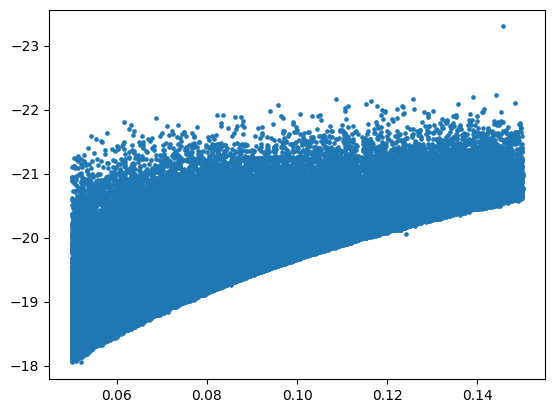

In [6]:
plt.scatter(df2['z'],df2['Mr'],s=5.5)
plt.gca().invert_yaxis()

<Axes: xlabel='smass', ylabel='Count'>

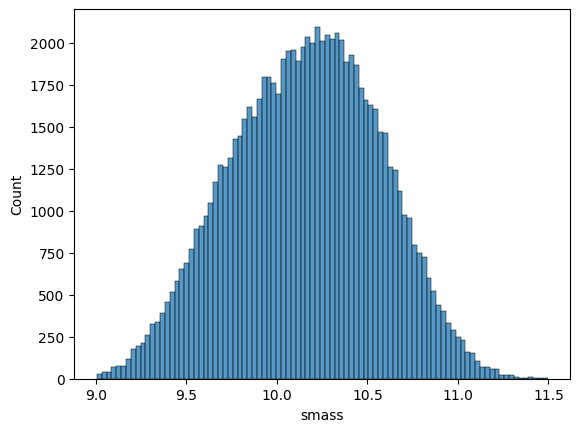

In [7]:
# Distribucion smas (log M*)
sns.histplot(data=df2,x='smass')

<Axes: xlabel='met', ylabel='Count'>

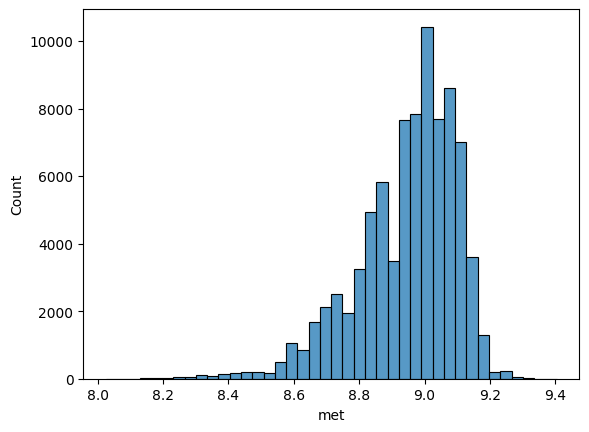

In [8]:
# Distribucion met (12 + log(O/H))
sns.histplot(data=df2,x='met',bins=40)

In [9]:
counts,bins = np.histogram(df2['smass'],bins=20)
b_min = bins[:-1]
b_max = bins[1:]
mids = (bins[1:] + bins[:-1])/2

# get smass:(log M*)
# get met:12 + log(O/H)
smass = np.array(df2['smass'])
met = np.array(df2['met'])
# get weights
w = np.array(df2['w'])

# get indexes.
indx = [np.where((smass<=b[1])&(smass>=b[0]))[0] for b in zip(b_min,b_max)]


In [10]:
# get met values in each bin (each bin isrepresented by set of indexes in indx)
# then get the mean
met_ = [np.array(met[idx]) for idx in indx]
w_ = [np.array(w[idx]) for idx in indx]



In [11]:
# Mean
met_mean = [np.mean(_) for _ in met_]
# Variance
met_variance = [(np.sum(e[2]*(e[0]-e[1])**2)/np.sum(e[2]))**0.5   for e in zip(met_,met_mean,w_)]

# Weighted mean
met_weigthed_mean = [(np.sum(e[0]*e[1])/np.sum(e[1])) for e in zip(met_,w_)]
# Weighted variance
met_weigthed_variance = [(np.sum(e[2]*(e[0]-e[1])**2)/np.sum(e[2]))**0.5   for e in zip(met_,met_weigthed_mean,w_)]

# Median
met_median = np.array([np.median(_) for _ in met_])
met_q_25 = np.array([np.quantile(_,0.25) for _ in met_])
met_q_75 = np.array([np.quantile(_,0.75) for _ in met_])
err_0 = np.abs(met_median-met_q_25)
err_1 = np.abs(met_median-met_q_75)

Text(0, 0.5, '$12 + log(O/H)$')

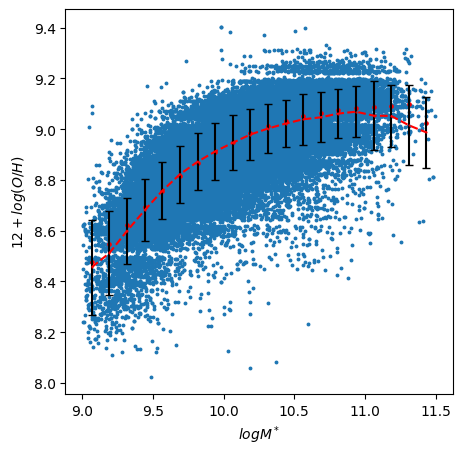

In [12]:
# Plot scatter and mean
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.scatter(smass,met,s=3.2)
ax.scatter(mids,met_mean,s=5.5,c='red')
ax.errorbar(mids, met_weigthed_mean, yerr=met_variance, capsize=3, fmt="r--o", ecolor = "black", markersize=0.5)

ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")

<ErrorbarContainer object of 3 artists>

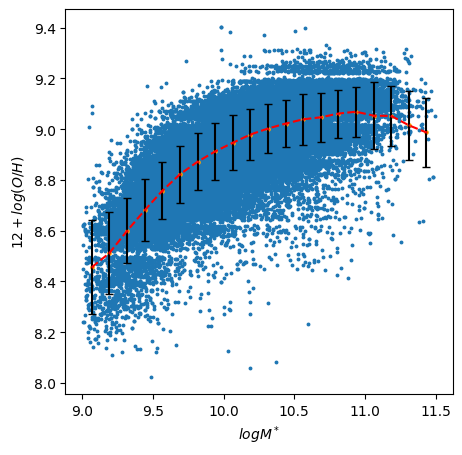

In [13]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(smass,met,s=3.2)
ax.scatter(mids,met_weigthed_mean,s=5.5,c="orange")
ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")
ax.errorbar(mids, met_weigthed_mean, yerr=met_weigthed_variance, capsize=3, fmt="r--o", ecolor = "black", markersize=0.5)

Text(0, 0.5, '$12 + log(O/H)$')

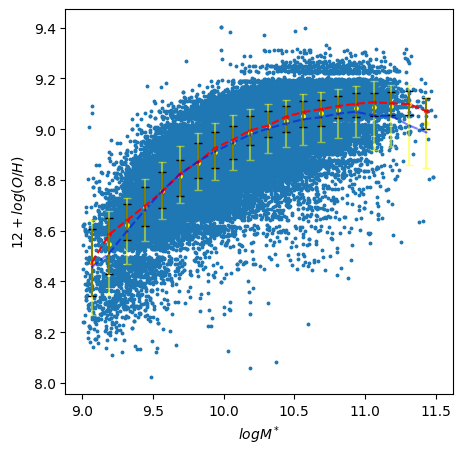

In [14]:
# Plot scatter and median
# plt.fill_between(x,y-error,y+error,alpha=0.5)
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.scatter(smass,met,s=3.2)
ax.scatter(mids,met_median,s=5.5,c='red')
ax.errorbar(mids, met_median, yerr=(err_0,err_1), capsize=3, fmt="r--o", ecolor = "black", markersize=0.5)
ax.scatter(mids,met_mean,s=5.5,c='yellow')
ax.errorbar(mids, met_weigthed_mean, yerr=met_variance, capsize=3, fmt="b--o", ecolor = "yellow", markersize=0.5, alpha=0.5)

ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")

# PLOTS EN FUNCION DEL TIPO

In [15]:
df2[['pe','ps']]

,pe,ps
0,0.062,0.909
1,0.164,0.745
2,0.202,0.623
3,0.062,0.909
4,0.000,1.000
...,...,...
84097,0.433,0.525
84098,0.433,0.525
84099,0.958,0.042
84100,0.039,0.941


In [16]:
df_zoo = df2[(df2['pe']>0.8)|(df2['pe']<0.2)]
df_zoo.reset_index(inplace=True)
df_zoo_e = df_zoo[df_zoo['pe']>0.8]
df_zoo_s = df_zoo[(df_zoo['pe']<0.1)&(df_zoo['ps']>0.9)]

In [17]:
df_zoo_s.shape[0]

18781

In [18]:
def calculator(df):
    counts,bins = np.histogram(df['smass'],bins=10) # Remover los bines con pocos puntos.
    b_min = bins[:-1]
    b_max = bins[1:]
    mids = (bins[1:] + bins[:-1])/2

    # get smass:(log M*)
    # get met:12 + log(O/H)
    smass = np.array(df['smass'])
    met = np.array(df['met'])
    # get weights
    w = np.array(df['w'])


    # get indexes.
    indx = [np.where((smass<=b[1])&(smass>=b[0]))[0] for b in zip(b_min,b_max)]

    # get met values in each bin (each bin isrepresented by set of indexes in indx)
    # then get the mean
    met_ = [np.array(met[idx]) for idx in indx]
    w_ = [np.array(w[idx]) for idx in indx]

    # Mean
    met_mean = [np.mean(_) for _ in met_]
    # Variance
    met_variance = [(np.sum(e[2]*(e[0]-e[1])**2)/np.sum(e[2]))**0.5   for e in zip(met_,met_mean,w_)]

    # Weighted mean
    met_weigthed_mean = [(np.sum(e[0]*e[1])/np.sum(e[1])) for e in zip(met_,w_)]
    # Weighted variance
    met_weigthed_variance = [(np.sum(e[2]*(e[0]-e[1])**2)/np.sum(e[2]))**0.5   for e in zip(met_,met_weigthed_mean,w_)]

    # Median
    met_median = np.array([np.median(_) for _ in met_])
    met_q_25 = np.array([np.quantile(_,0.25) for _ in met_])
    met_q_75 = np.array([np.quantile(_,0.75) for _ in met_])
    err_0 = np.abs(met_median-met_q_25)
    err_1 = np.abs(met_median-met_q_75)
    return met_median,err_0,err_1,smass,met,mids

# ELIPTICAS

In [19]:
median_zoo,err0_zoo,err1_zoo,smass_zoo,met_zoo,mids_zoo=calculator(df_zoo_e)

Text(0, 0.5, '$12 + log(O/H)$')

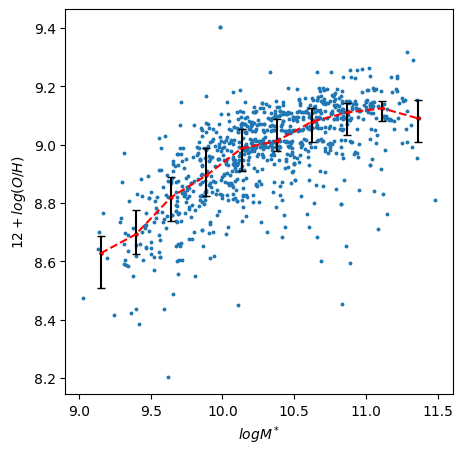

In [20]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.scatter(smass_zoo,met_zoo,s=3.2)
ax.scatter(mids_zoo,median_zoo,s=5.5,c='red')
ax.errorbar(mids_zoo, median_zoo, yerr=(err0_zoo,err1_zoo), capsize=3, fmt="r--o", ecolor = "black", markersize=0.5)
# ax.scatter(mids,met_mean,s=5.5,c='yellow')
# ax.errorbar(mids, met_weigthed_mean, yerr=met_variance, capsize=3, fmt="r--o", ecolor = "yellow", markersize=0.5)

ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")

# ESPIRALES

In [21]:
median_zoo_s,err0_zoo_s,err1_zoo_s,smass_zoo_s,met_zoo_s,mids_zoo_s=calculator(df_zoo_s)

Text(0, 0.5, '$12 + log(O/H)$')

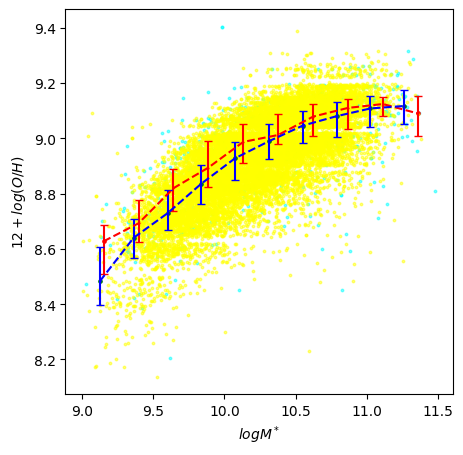

In [22]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.scatter(smass_zoo,met_zoo,s=3.2, c='cyan',alpha=0.5)
ax.scatter(mids_zoo,median_zoo,s=5.5,c='red')
ax.errorbar(mids_zoo, median_zoo, yerr=(err0_zoo,err1_zoo), capsize=3, fmt="r--o", ecolor = "red", markersize=0.5)


ax.scatter(smass_zoo_s,met_zoo_s,s=3.2,c='yellow',alpha=0.5)
ax.scatter(mids_zoo_s,median_zoo_s,s=5.5,c='green')
ax.errorbar(mids_zoo_s, median_zoo_s, yerr=(err0_zoo_s,err1_zoo_s), capsize=3, fmt="b--o", ecolor = "blue", markersize=0.5)


# ax.scatter(mids,met_mean,s=5.5,c='yellow')
# ax.errorbar(mids, met_weigthed_mean, yerr=met_variance, capsize=3, fmt="r--o", ecolor = "yellow", markersize=0.5)

ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")

In [23]:
df2['c'].describe()
df_c_3 = df2[df2['c']>3.0] 
df_c_25 = df2[df2['c']<2.5]

In [24]:
# df_c_3 = df2[df2['c']>3.0] 
# df_c_25 = df2[df2['c']<2.5]
median_3,err03,err13,smass3,met3,mids3=calculator(df_c_3)
median_25,err025,err125,smass25,met25,mids25=calculator(df_c_25)

Text(0, 0.5, '$12 + log(O/H)$')

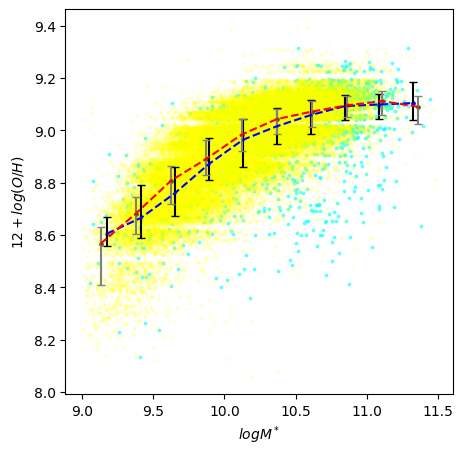

In [25]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.scatter(smass3,met3,s=3.2,c='cyan',alpha=0.5)
ax.scatter(mids3,median_3,s=5.5,c='blue')
ax.errorbar(mids3, median_3, yerr=(err03,err13), capsize=3, fmt="b--o", ecolor = "black", markersize=0.5)


ax.scatter(smass25,met25,s=3.2,c='yellow',alpha=0.1)
ax.scatter(mids25,median_25,s=5.5,c='green')
ax.errorbar(mids25, median_25, yerr=(err025,err125), capsize=3, fmt="r--o", ecolor = "gray", markersize=0.5)


# ax.scatter(mids,met_mean,s=5.5,c='yellow')
# ax.errorbar(mids, met_weigthed_mean, yerr=met_variance, capsize=3, fmt="r--o", ecolor = "yellow", markersize=0.5)

ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")

In [26]:
# zandivares y martinez 2011
# Cosas para hacer


# Cosas para hacer
- Leer el paper zandivares y martinez 2011: Basicamente tendriamos que volver a ajustar las dobles gaussianas como hicimos en el practico 2.
- Despues encontrar esos puntos donde se cortan las gaussianas
- Despues se elaboraria un ajuste cuadratico con esos puntos.
- Las galaxias que quedan de un lado del ajuste son de un tipo y las que quedan del otro lado son de otro tipo.
- Para el grafico del galaxy zoo, tendrias que separar las elipticas con > 0.7 y las espirales con menor a 0.1.


Como proceder:
- Como hay una gran cantidad de galaxias de campo (azules) el punto de corte lo voy a considerar en u-r = 2.2

In [27]:
# df_z = df2[(df2['pe']>0.8)|(df2['pe']<0.2)]
# df_z = df2[(df2['pe']>0.8)]
df_z = df2[(df2['pe']<0.2)]


<Axes: xlabel='ur', ylabel='Count'>

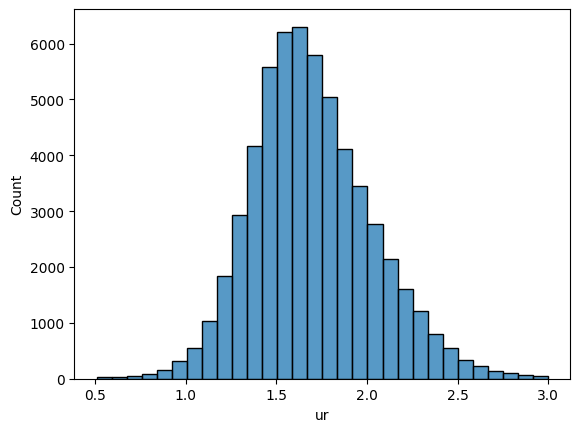

In [28]:
sns.histplot(data=df_z[(df_z['ur']<3.0)&(df_z['ur']>0.5)],x='ur',bins=30)

In [29]:
df_ur_up = df2[df2['ur']>2.2] 
df_ur_down = df2[df2['ur']<2.2]

median_up,err0_up,err1_up,smass_up,met_up,mids_up=calculator(df_ur_up)
median_down,err0_down,err1_down,smass_down,met_down,mids_down=calculator(df_ur_down)

Text(0, 0.5, '$12 + log(O/H)$')

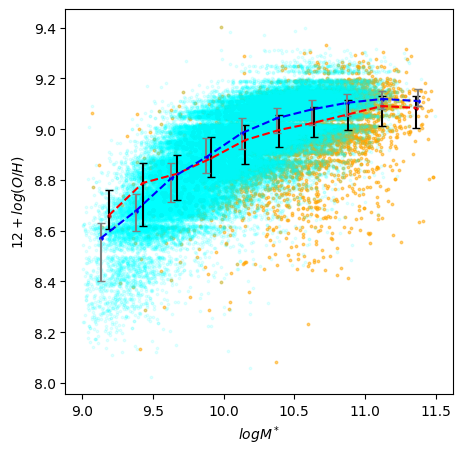

In [30]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.scatter(smass_up,met_up,s=3.2,c='orange',alpha=0.5)
ax.scatter(mids_up,median_up,s=5.5,c='red')
ax.errorbar(mids_up, median_up, yerr=(err0_up,err1_up), capsize=3, fmt="r--o", ecolor = "black", markersize=0.5)


ax.scatter(smass_down,met_down,s=3.2,c='cyan',alpha=0.1)
ax.scatter(mids_down,median_down,s=5.5,c='blue')
ax.errorbar(mids_down, median_down, yerr=(err0_down,err1_down), capsize=3, fmt="b--o", ecolor = "gray", markersize=0.5)


# ax.scatter(mids,met_mean,s=5.5,c='yellow')
# ax.errorbar(mids, met_weigthed_mean, yerr=met_variance, capsize=3, fmt="r--o", ecolor = "yellow", markersize=0.5)

ax.set_xlabel(r"$log{M^*}$")
ax.set_ylabel(r"$12 + log(O/H)$")

In [33]:
list(df2)

['index',
 'ra',
 'dec',
 'z',
 'Mr',
 'ur',
 'mur',
 'r50',
 'c',
 'smass',
 'sfr',
 'ssfr',
 'd4000',
 'met',
 'w',
 'mest',
 'tau',
 'zm',
 'rsf',
 'pe',
 'ps',
 'nuvr']

<Axes: xlabel='smass', ylabel='ssfr'>

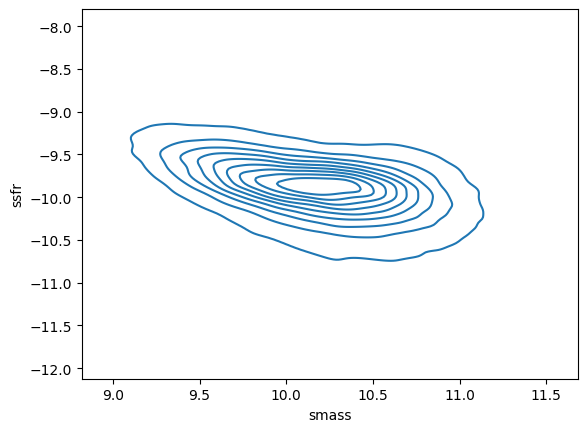

In [35]:
sns.kdeplot(data=df2,x='smass',y='ssfr')

In [38]:
smass = np.array(df2['smass'])
ssfr = np.array(df2['ssfr'])
w = np.array(df2['w'])

In [84]:
hist = np.histogram2d(smass, ssfr, bins=80, density=True,weights=w)
x_mids = (hist[1][:-1]+hist[1][1:])/2
y_mids = (hist[2][:-1]+hist[2][1:])/2




/tmp/ipykernel_24644/3618101972.py:2: UserWarning: The following kwargs were not used by contour: 'fill'
  ax.contour(x_mids,y_mids,hist[0].T,fill=True)


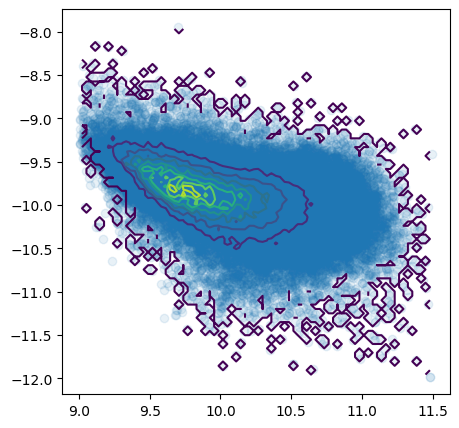

In [88]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.contour(x_mids,y_mids,hist[0].T,fill=True)
ax.scatter(smass,ssfr, alpha=0.1)
# plt.colorbar()